In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import math
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Distance

In [44]:
data = pd.read_csv('http://astroweb.case.edu/izehavi/336/cfa2.dat',header = None)
df = pd.DataFrame(data)
df =df.drop([0,1],axis = 0)
df = df.reset_index()
df

,index,0
0,2,08 00 00.0 +30 55 00 14.90 12160 ...
1,3,08 01 00.0 +30 19 00 15.40 4148 ...
2,4,08 01 12.0 +29 38 00 15.20 5503 ...
3,5,08 01 12.0 +29 38 00 15.40 5354 ...
4,6,08 01 54.0 +29 51 00 15.50 6500 ...
...,...,...
1150,1152,16 58 48.0 +29 54 00 15.20 10539 ...
1151,1153,16 58 54.0 +28 05 00 15.00 9856 ...
1152,1154,16 59 33.6 +30 23 57 15.30 10051 ...
1153,1155,16 59 36.0 +30 15 00 15.20 10742 ...


In [137]:
s = df[0][2]
split = s.split(' ')
split
def transformData(df):
    RA = []
    Dec = []
    M_B = []
    Vcz = []
    error = []
    sc = []
    #Cycle through Data Set 
    for i in range(len(df)):
        s = df[0][i]
        split = s.split()
        #Sky Coord Data 
        line = dataForSkyCoord(split)
        sc.append(skyCoord(line))
        #Get RA
        tempRA = []
        for i in range(0,3):
            tempRA.append(split[i])
        RA.append(tempRA)
        #Get Dec
        tempDec = []
        for i in range(3,6):
            tempDec.append(split[i])
        Dec.append(tempDec)
        
        #Get M_B 
        M_B.append(split[6])
        #GEt v=cv
        Vcz.append(split[7])
        #Get error
        error.append(split[8])
    df.drop([0,1],axis = 0)
    df.reset_index()
    df['sc'] = sc
    df['RA'] = RA
    df['Dec'] = Dec
    df['M_B'] = M_B
    df['Vcz'] = Vcz
    df['error'] = error
    return df 
def dataForSkyCoord(splitString):
    final = []
    for i in range(0,6):
        final.append(splitString[i])
    return ' '.join(final)
def skyCoord(stringValue):
    c = SkyCoord(stringValue, unit=(u.hourangle, u.deg))
    radian = c.ra.wrap_at(180*u.deg).radian
    degree = c.dec.degree
    return[radian,degree]    
df = transformData(df)
df.head()

,index,0,RA,Dec,M_B,Vcz,error,graph-RA,graph-DEC,sc
0,2,08 00 00.0 +30 55 00 14.90 12160 ...,"[08, 00, 00.0]","[+30, 55, 00]",14.90,12160,37,2.094395,30,"[2.0943951023931953, 30.916666666666668]"
1,3,08 01 00.0 +30 19 00 15.40 4148 ...,"[08, 01, 00.0]","[+30, 19, 00]",15.40,4148,37,2.098758,30,"[2.0987584255231813, 30.316666666666666]"
2,4,08 01 12.0 +29 38 00 15.20 5503 ...,"[08, 01, 12.0]","[+29, 38, 00]",15.20,5503,35,2.099631,29,"[2.099631090149179, 29.633333333333333]"
3,5,08 01 12.0 +29 38 00 15.40 5354 ...,"[08, 01, 12.0]","[+29, 38, 00]",15.40,5354,30,2.099631,29,"[2.099631090149179, 29.633333333333333]"
4,6,08 01 54.0 +29 51 00 15.50 6500 ...,"[08, 01, 54.0]","[+29, 51, 00]",15.50,6500,38,2.102685,29,"[2.1026854163401687, 29.85]"


<ipython-input-140-623d97afc243>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$0^h$','$3^h$', '$6^h$', '$9^h$', '$12^h$', '$15^h$', '$18^h$',


<Figure size 576x302.4 with 0 Axes>

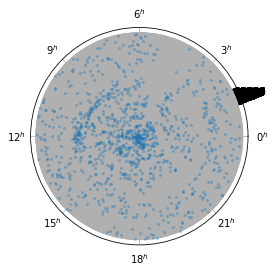

In [140]:
def radians(df):
    finData = []
    for i  in range(len(df)):
        finData.append(df['sc'][i][0])
def decF(df):
    finData = []
    for i in range(len(df)):
        data = df['Dec'][i]
        temp = data[0]
        temp = int(temp)
        finData.append(temp)
    df['graph-DEC'] = finData
def graph(df):
    ra_rad = []
    dec_rad = []
    for i in range(len(df)):
        dec_rad.append(df['Vcz'][i])
        ra_rad.append(df['sc'][i][1])
    plt.figure(figsize=(8,4.2))
    fig = plt.figure()
    ax = fig.add_subplot(projection='polar')
    ax.set_xticklabels(['$0^h$','$3^h$', '$6^h$', '$9^h$', '$12^h$', '$15^h$', '$18^h$',
    '$21^h$'], fontsize=10)
    

    plt.grid(True)
    plt.plot(ra_rad, dec_rad, 'o', markersize=2, alpha=0.3)
    plt.show()
        
        
graph(df)